In [140]:
import matplotlib.pyplot as plt
import pandas as pd 

from datetime import datetime
from matplotlib.pyplot import figure

In [141]:
def user_choice():
    while True:
        try:
            print("Please choose which data you want to \n")
            print("A/a for U.S data")
            print("B/b for state data")
            choice = input("Enter: ")
        except ValueError:
            print("Invalid choice") 
            continue
        if choice.lower() not in ('a', 'b'): 
            print("Invalid choice")
            continue
        if choice.lower() == 'q':
            return
        else:
            if(choice.lower() == "a"):
                header = ['data', 'cases', 'deaths']
                return 'a'
            elif(choice.lower() == "b"):
                header = ['date', 'state', 'fips' ,'cases', 'deaths']
                return 'b'
            break; 

In [142]:
def read_file(choice):
    if(choice == 'a'):
        df = pd.read_csv("https://github.com/nytimes/covid-19-data/raw/master/us.csv")
    else:
        df = pd.read_csv("https://github.com/nytimes/covid-19-data/raw/master/us-states.csv")
    return df

Please choose which data you want to 

A/a for U.S data
B/b for state data


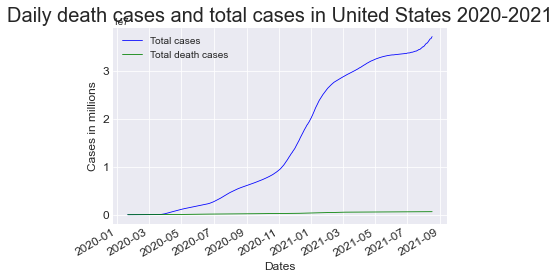

In [144]:
choice = user_choice()
data = read_file(choice)

data['date'] = data['date'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
#list(data)
#data.head()

fig, ax = plt.subplots()
plt.style.use('seaborn-darkgrid')
plt.xlabel("Dates", fontsize = 12)
plt.ylabel("Cases", fontsize = 12)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)



if(choice == 'a'): 
    ax.set_ylabel('Cases in millions')
    ax.plot(data['date'], data['cases'], c = 'blue', label = 'Total cases', linewidth = 0.8, markersize = 5)
    ax.plot(data['date'], data['deaths'], c = 'green', label = 'Total death cases', linewidth = 0.8, markersize = 5)
    plt.title("Daily death cases and total cases in United States 2020-2021", fontsize = 20)
else: 
    data.sort_values(by=['date','state'])
    while True:
        try:
            print("Please choose which state you want to see \n")
            choice = input("Enter: ")
        except ValueError:
            print("Invalid choice") 
            continue
        if choice == 'q':
            break
        if choice in data.values:
            plt.title(f"Daily death cases And total cases in {choice} 2020-2021", fontsize = 20)
            data2 = data[data['state'] == choice]
            ax.plot(data2['date'], data2['cases'], c = 'blue', label = 'Total cases', linewidth = 0.8, markersize = 5)
            ax.plot(data2['date'], data2['deaths'], c = 'green', label = 'Total death cases', linewidth = 0.8, markersize = 5)
            
        else:
            print('No data for state you choice')
            continue
        break

ax.legend()
plt.gcf().autofmt_xdate()
plt.show()
